In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from scipy.optimize import curve_fit
import matplotlib
%matplotlib inline
#%matplotlib widget

In [2]:
def func(x, A1, s1, m1, A2, s2, m2 ,c):
    return A1 * np.exp(-s1 * (x-m1)**2) + A2 * np.exp(-s2 * (x-m2)**2) + c
def g1(x, A1, s1, m1, c):
    return A1 * np.exp(-s1 * (x-m1)**2)+c

In [3]:
hdu = fits.open('goodsn-42-G141_01060.2D.fits') ## Load fits
sci_d = hdu['SCI'].data
sci_h = hdu['SCI'].header
wl = np.linspace(1*sci_h['CRVAL1'],1*sci_h['CRVAL1'] + ((sci_h['NAXIS1']-1)*sci_h["CD1_1"]),sci_h['NAXIS1'])

In [4]:
wl_d=np.linspace(1*sci_h['CRVAL1'],1*sci_h['CRVAL1'] + ((sci_h['NAXIS1']-1)*sci_h["CD1_1"]),sci_h['NAXIS1']*10)

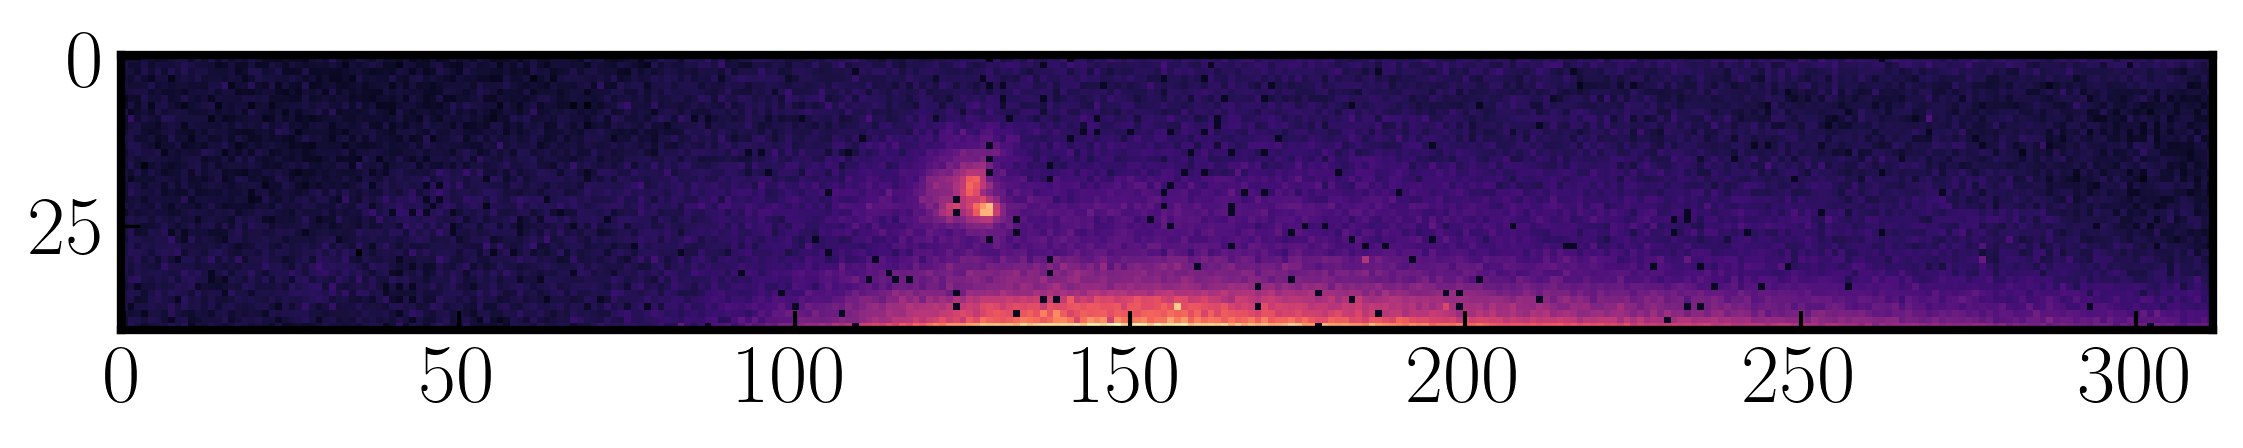

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(hdu['SCI'].data)
plt.show()

In [6]:
data = hdu['SCI'].data[22,110:140]   ## Extract fits file data (values got by eyeballing the imshow)
print(data)
hdu['SCI'].header
# Observed peaks of OIII line
ns = np.nanmean(hdu['SCI'].data[23:25,110:140],axis=0)
ss = np.nanmean(hdu['SCI'].data[19:21,110:140],axis=0)
wl_s = wl[110:140]

[0.07025735 0.10124537 0.08127703 0.08352374 0.0865227  0.08374514
 0.07721471 0.07999526 0.083603   0.09660716 0.127021   0.10731463
 0.15107947 0.1955422  0.20785707 0.17753332 0.20437395 0.25618986
 0.29427448 0.32659609 0.19281928 0.12941686 0.09991945 0.09852149
 0.0953414  0.07620114 0.07649414 0.08685088 0.07438385 0.0758074 ]


In [7]:
err= hdu['SCI'].data[22, 50:100]
err2=hdu['SCI'].data[22,150:200]
err1=np.mean([err,err2])

In [8]:
wl_s

array([12653.05003688, 12675.6468986 , 12698.24376031, 12720.84062202,
       12743.43748373, 12766.03434545, 12788.63120716, 12811.22806887,
       12833.82493058, 12856.4217923 , 12879.01865401, 12901.61551572,
       12924.21237743, 12946.80923915, 12969.40610086, 12992.00296257,
       13014.59982428, 13037.196686  , 13059.79354771, 13082.39040942,
       13104.98727113, 13127.58413285, 13150.18099456, 13172.77785627,
       13195.37471798, 13217.97157969, 13240.56844141, 13263.16530312,
       13285.76216483, 13308.35902654])

In [9]:
wl_s

array([12653.05003688, 12675.6468986 , 12698.24376031, 12720.84062202,
       12743.43748373, 12766.03434545, 12788.63120716, 12811.22806887,
       12833.82493058, 12856.4217923 , 12879.01865401, 12901.61551572,
       12924.21237743, 12946.80923915, 12969.40610086, 12992.00296257,
       13014.59982428, 13037.196686  , 13059.79354771, 13082.39040942,
       13104.98727113, 13127.58413285, 13150.18099456, 13172.77785627,
       13195.37471798, 13217.97157969, 13240.56844141, 13263.16530312,
       13285.76216483, 13308.35902654])

In [64]:
#           A1,  s1, m1,  A2,  s2, m2,   c
lower_b = [0.15-0.075, 1/200**2, 12930, 0.2-0.075,1/100**2, 13001,0.07]
upper_b = [0.275-0.075, 1/50**2, 13000, 0.30-0.075, 1/50**2,13100, 0.075]

popt, pcov = curve_fit(func,wl_s,ns, bounds=(lower_b, upper_b))


In [65]:
popt

array([7.50000000e-02, 4.00000000e-04, 1.29300000e+04, 1.80328536e-01,
       3.25269101e-04, 1.30642960e+04, 7.20419049e-02])

In [66]:
## These are the rest frame line values for OIII
O3_A = 5006.843 ## in angstroms!
O3_B= 4958.911 ## in angstroms!
z = 1.6095

## Convert to observer frame
O3_A_obs = O3_A*(1+z)
O3_B_obs = O3_B*(1+z)

In [67]:
wl_d = np.linspace(wl_s[1],wl_s[-1],1000)

<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:10: SyntaxWarning: invalid escape sequence '\A'
<>:11: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:10: SyntaxWarning: invalid escape sequence '\A'
<>:11: SyntaxWarning: invalid escape sequence '\A'
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_17537/3430942050.py:8: SyntaxWarning: invalid escape sequence '\A'
  ax.set_xlabel('Wavelength [$\AA$]')
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_17537/3430942050.py:10: SyntaxWarning: invalid escape sequence '\A'
  ax.axvline(O3_A_obs,ls='-.',c='c',label="O[III] 5006$\AA$")
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_17537/3430942050.py:11: SyntaxWarning: invalid escape sequence '\A'
  ax.axvline(O3_B_obs,ls='-',c='g',label="O[III] 4958$\AA$")


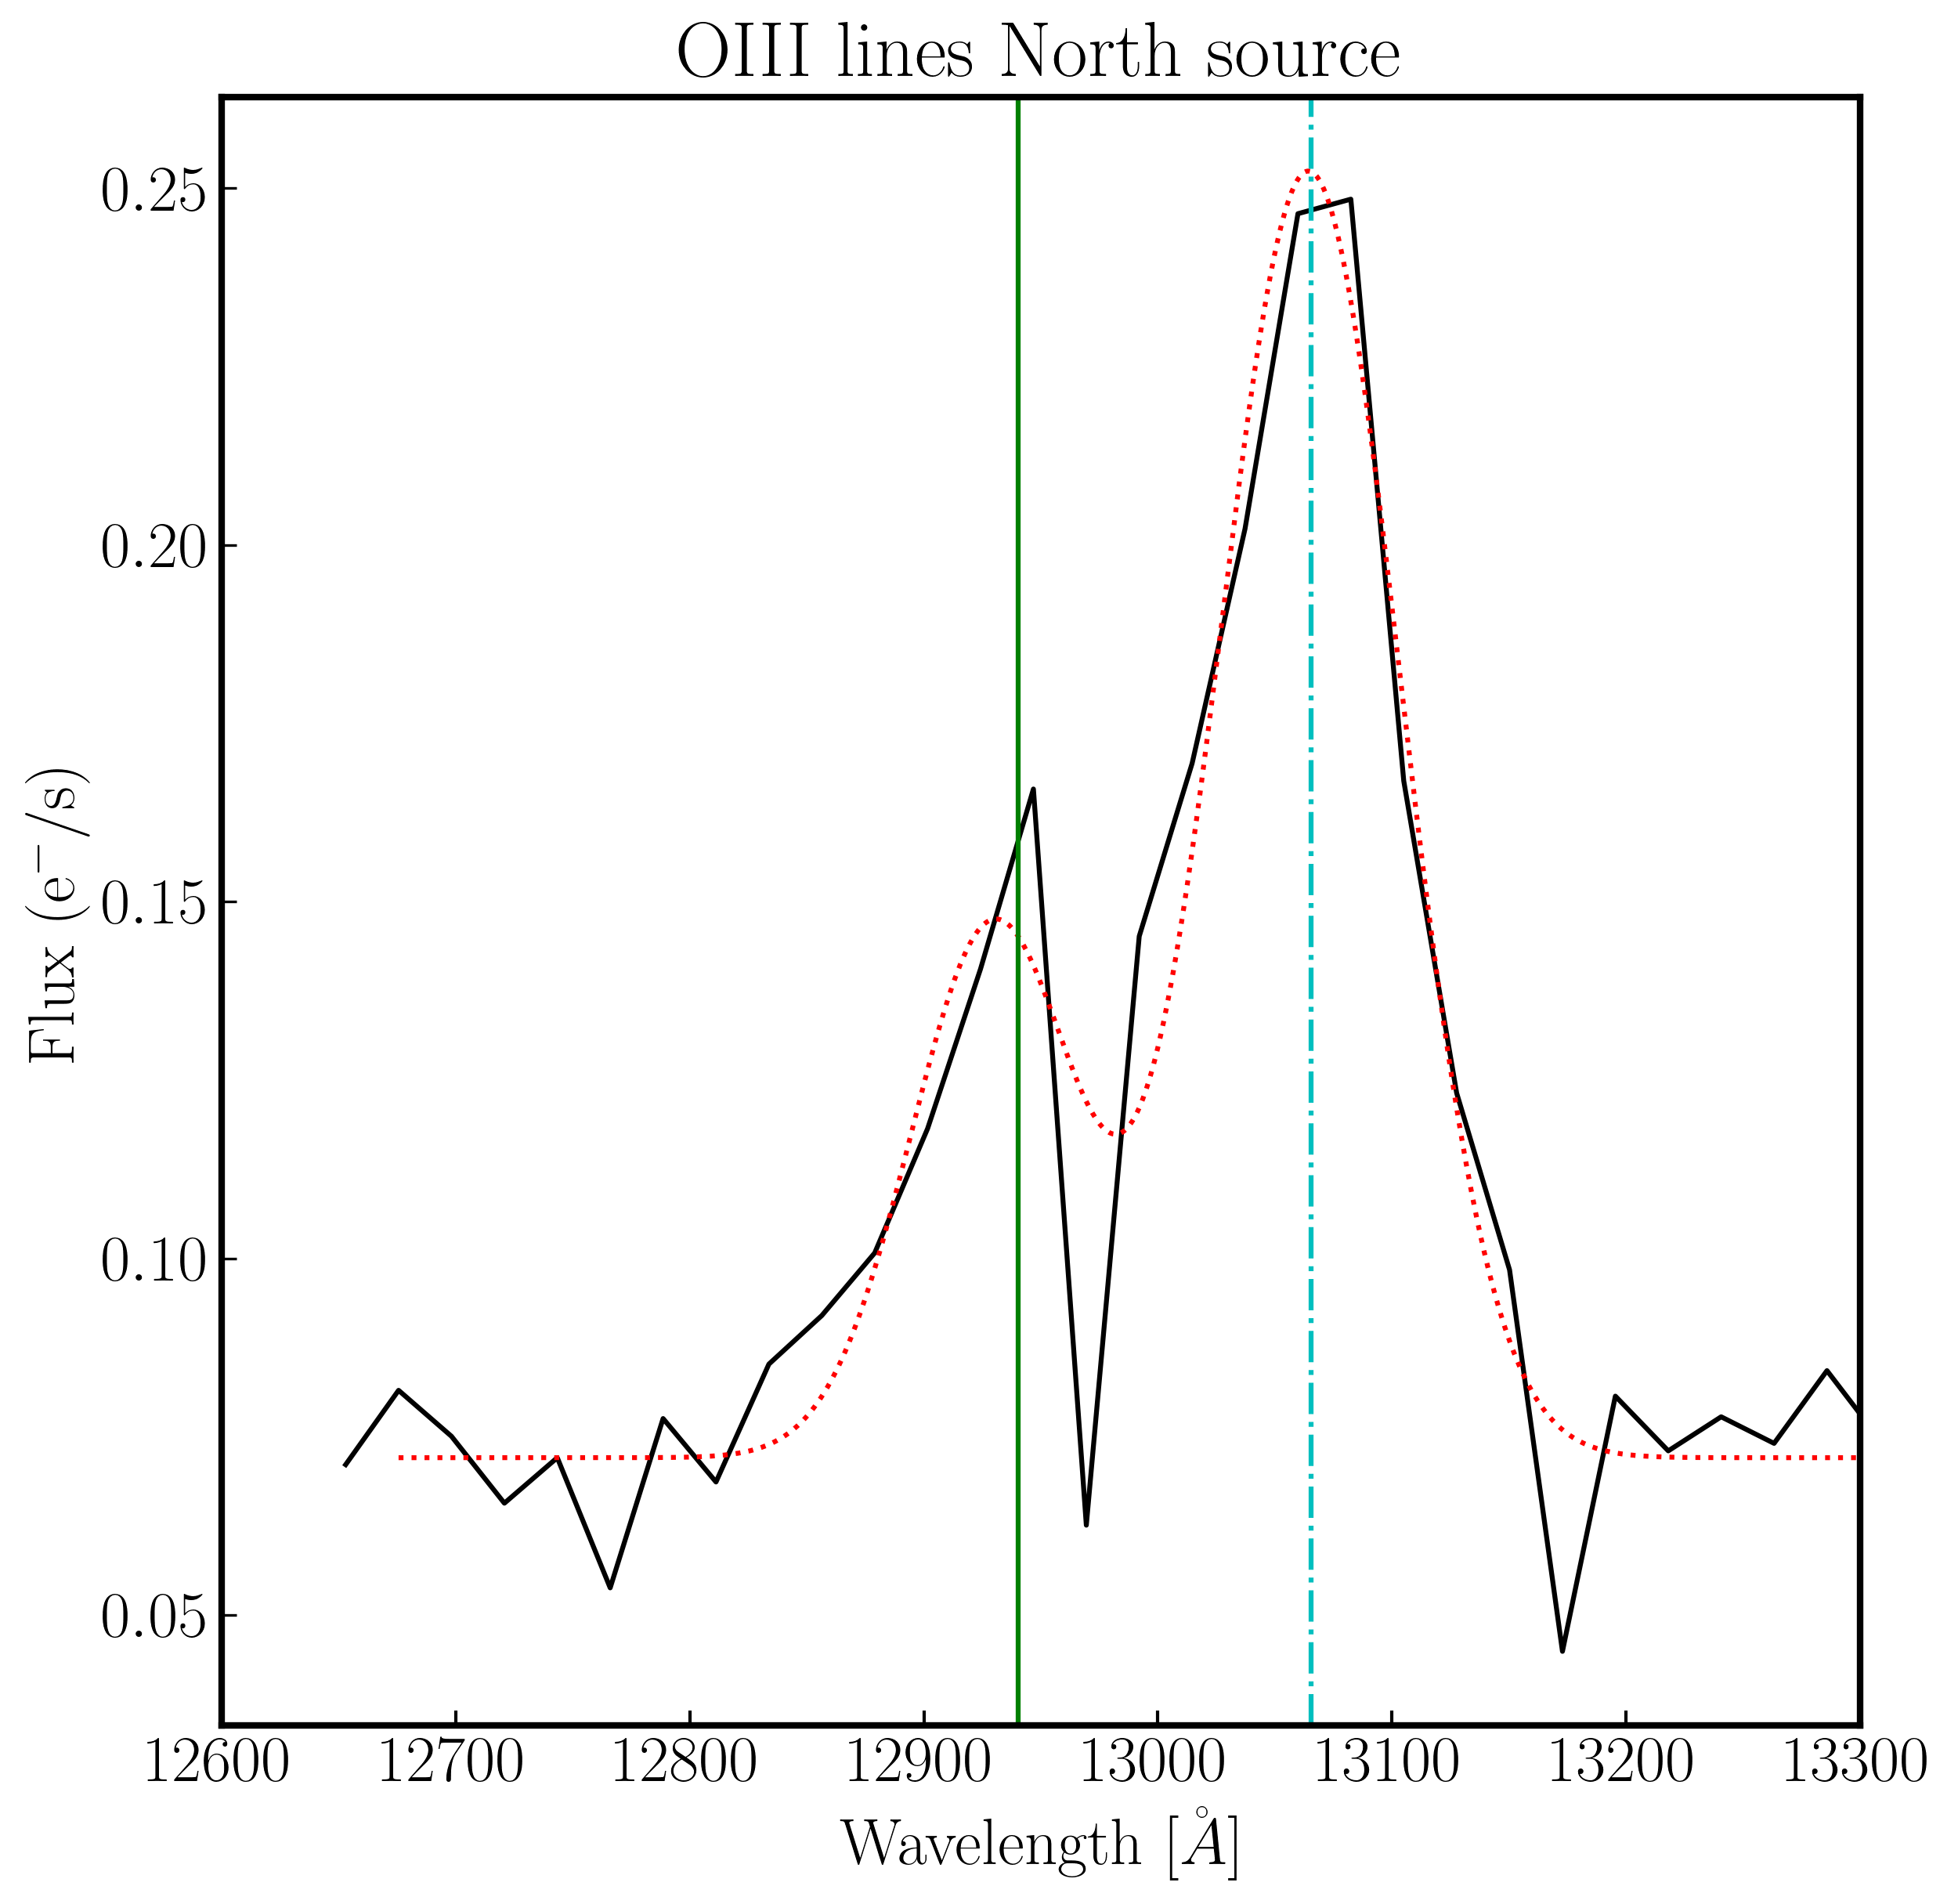

[7.50000000e-02 4.00000000e-04 1.29300000e+04 1.80328536e-01
 3.25269101e-04 1.30642960e+04 7.20419049e-02]
[[ 1.96038122e-04  1.31408808e-06 -1.04457401e-02  1.57454931e-05
  -1.33370232e-07 -4.61745192e-03 -1.71643393e-05]
 [ 1.31408808e-06  4.06399617e-08 -3.82749194e-04 -4.81350896e-07
  -5.06424482e-09 -2.93737251e-04  1.92581414e-07]
 [-1.04457401e-02 -3.82749194e-04  6.86733711e+01  1.28869163e-02
   2.32582253e-04  8.91075806e+00  4.15249718e-03]
 [ 1.57454931e-05 -4.81350896e-07  1.28869163e-02  1.81415741e-04
   4.17508672e-07  5.21881939e-03 -1.74807226e-05]
 [-1.33370232e-07 -5.06424482e-09  2.32582253e-04  4.17508672e-07
   4.35672193e-09  5.48243724e-05  6.99132114e-08]
 [-4.61745192e-03 -2.93737251e-04  8.91075806e+00  5.21881939e-03
   5.48243724e-05  1.29592033e+01 -1.54996954e-03]
 [-1.71643393e-05  1.92581414e-07  4.15249718e-03 -1.74807226e-05
   6.99132114e-08 -1.54996954e-03  2.09122450e-05]]
The Amplitude of the first peak is: 0.07500000000000775
The Wavelength p

In [68]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(wl_s, ns,'k-')
ax.plot(wl_d, func(wl_d, *popt),'r:')


ax.set_ylabel('Flux (e$^-$/s)')
ax.set_xlabel('Wavelength [$\AA$]')
ax.set_title('OIII lines North source')
ax.axvline(O3_A_obs,ls='-.',c='c',label="O[III] 5006$\AA$")
ax.axvline(O3_B_obs,ls='-',c='g',label="O[III] 4958$\AA$")
plt.xlim(12600, 13300)
#ax = fig.add_subplot(122) 
#ax.errorbar(x, data,yerr=errs,ls='-')
#ax.plot(x_d, (popt[0]* np.exp(-popt[1] * (x_d-popt[2])**2)) + popt[-1],'g--')
#ax.plot(x_d, (popt[3]* np.exp(-popt[4] * (x_d-popt[5])**2)) + popt[-1],'c-.')
#ax.set_xlabel('Pixels')

plt.show()
#plt.savefig('OIII Gaussian.png')
#info obtained:
print(popt)
print(pcov)
print('The Amplitude of the first peak is:', popt[0])
print('The Wavelength peak of the first peak is:')
print('The Amplitude of the second peak is:')


pcovd=np.diag(pcov)
print(np.sqrt(pcovd))

### Plot residuals 
fig = plt.figure(figsize=(9,4.5))
ax = fig.add_subplot(111)
ax.plot(x,np.abs(func(x, *popt)-data),'ko')
ax.set_ylim(0,0.1)
ax.set_ylabel('Residuals ($|$fit-data$|$)')
ax.set_xlabel('Pixels')
plt.show()

#wut
np.linalg.cond(pcov) ## Some redundancy in the fit

#errors on the outputs:  A1,  s1, m1,  A2,  s2, m2,   c
np.diag(pcov) # largest is m2?

#### Fit second gaussian

data2 = hdu['SCI'].data[19,110:140]        ## Extract fits file data (values got by eyeballing the imshow)

x2 = np.linspace(10167,(len(data2)-1)*22.59686171240901+10167.39524851952,len(data2))      ### Pixel x values (could convert to frequency using header!)
x_d2 = np.linspace(10167,(len(data2)-1)*22.59686171240901+10167.39524851952,len(data2)*10)

#     A1,  s1, m1,   c
lb = [0.185, 0.0, 15*22.59686171240901+10167.39524851952, 0.0]
ub = [0.3, 0.005, 20*22.59686171240901+10167.39524851952, 0.7]
popt, pcov = curve_fit(g1,x2,data2,bounds=(lb, ub))
popt

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(x2, data2,'k-')
ax.plot(x_d2, g1(x_d2, *popt),'r:')
#ax = fig.add_subplot(122)
#ax.plot(x, data,'k-')
#ax.plot(x_d, (popt[0]* np.exp(-popt[1] * (x_d-popt[2])**2)) + popt[-1],'g--')
plt.xlim(0*22.59686171240901+10167.39524851952, 30*22.59686171240901+10167.39524851952)
plt.title("OIII South source")
plt.ylabel("Flux (e-/s)")
ax.set_xlabel('Wavelength [$\AA$]')
plt.show()
plt.savefig('OIII Gaussian_SouthSource.png')
popt